# テキストデータ解析の概要

このノートブックでは、日本語テキストデータの基本的な解析手法を一通り実装・確認します。

扱う手法は以下の通りです。

- **形態素解析**  
  テキストを意味の最小単位である形態素に分割し、品詞情報を抽出する。日本語テキスト処理の前処理として必須。

- **共起ネットワーク**  
  単語同士が同じ文脈で共に出現する関係（共起）をネットワーク構造で表現し、単語の関連性や中心性を分析する。

- **感情分析**  
  テキストに含まれる感情的傾向（ポジティブ・ネガティブ）を自動的に判定する。

- **ワードクラウド**  
  単語の出現頻度を視覚的に可視化し、テキスト全体の特徴を直感的に把握する。


これらの手法を組み合わせることで、単語レベルの出現傾向だけでなく、単語同士の関係性や文章の感情的特徴まで多面的にテキストを分析できます。

本ノートブックでは、それぞれの手法について
- 背景と目的
- 必要なライブラリの導入
- サンプルコードと実行例
- 結果の可視化

を順に示し、テキストマイニングの基礎を一通り理解できる構成としています。

---

# 形態素解析の概要と利用例

形態素解析とは、文章を「形態素」と呼ばれる意味を持つ最小単位に分割し、それぞれの品詞（名詞、動詞、助詞など）を特定する処理です。  
日本語は単語の区切りが空白で明示されないため、自然言語処理の基礎として必須の技術です。

例えば、以下の文を考えます。
>明日は雨が降るかもしれない。

これを形態素解析すると、次のように単語と品詞に分かれます。

| 形態素 | 品詞 |
|--------|------|
| 明日   | 名詞 |
| は     | 助詞 |
| 雨     | 名詞 |
| が     | 助詞 |
| 降る   | 動詞 |
| かも   | 助詞（副助詞） |
| しれ   | 動詞 |
| ない   | 助動詞 |
| 。     | 記号 |

この例のように、形態素解析では**文章構造を機械的に把握**できるため、テキストマイニング、検索エンジン、機械翻訳、チャットボットなど多様な応用が可能になります。

## Janomeによる実装例

Pythonで手軽に形態素解析を行うライブラリとして、`Janome`がよく利用されます。

以下は、先ほどの例文をJanomeで解析するコード例です。

In [10]:
from janome.tokenizer import Tokenizer

# 解析対象の文
text = "明日は雨が降るかもしれない。"

# Tokenizerインスタンスを作成
tokenizer = Tokenizer()

# 形態素解析を実行
for token in tokenizer.tokenize(text):
    print(f"表層形: {token.surface} \t 品詞: {token.part_of_speech}")

表層形: 明日 	 品詞: 名詞,副詞可能,*,*
表層形: は 	 品詞: 助詞,係助詞,*,*
表層形: 雨 	 品詞: 名詞,一般,*,*
表層形: が 	 品詞: 助詞,格助詞,一般,*
表層形: 降る 	 品詞: 動詞,自立,*,*
表層形: かも 	 品詞: 助詞,副助詞,*,*
表層形: しれ 	 品詞: 動詞,自立,*,*
表層形: ない 	 品詞: 助動詞,*,*,*
表層形: 。 	 品詞: 記号,句点,*,*


---

# 共起ネットワークの概要と利用例

共起ネットワークとは、文章や文書集合の中で**単語が同時に出現する関係（共起）**をネットワーク構造で表現する手法です。  
単語同士のつながりや重要性を視覚的・統計的に把握することができます。

## 基本的な考え方

文章を解析し、一定の範囲（例: 同じ文・同じ段落・一定のウィンドウサイズ）に出現した単語の組を**共起関係**とみなします。  
これを単語をノード（頂点）、共起回数をエッジ（辺）の重みとしてネットワークにします。

たとえば、以下の2つの文章を考えます。

1. 猫が庭で遊んでいる。
2. 犬と猫が仲良く遊ぶ。

このとき、「猫」と「遊ぶ」は両方の文章で一緒に現れます。この共起関係を記録します。

## 共起ネットワーク構築の手順

1. **テキストを分かち書き・形態素解析**  
   単語単位に分割し、不要な品詞（例: 記号や助詞）を除外します。

2. **共起ペアの抽出**  
   設定したウィンドウ内に共に現れる単語のペアを収集します。

3. **共起頻度の計算**  
   各ペアがどのくらい出現したかをカウントします。

4. **ネットワークの構築**  
   単語をノードとし、共起頻度をエッジの重みに設定します。

5. **可視化・解析**  
   ネットワーク図でつながりを視覚化し、重要な単語やコミュニティを抽出します。

## 利用例

- テキストマイニングでのキーワード抽出
- トピックや文脈の把握
- SNSやニュース記事のテーマ分析
- マーケティングにおける関連語の発見
  
## Pythonによる簡易的な実装例

共起ネットワークは、Pythonの`collections`や`networkx`ライブラリを組み合わせて作成できます。

以下は簡単な例です。

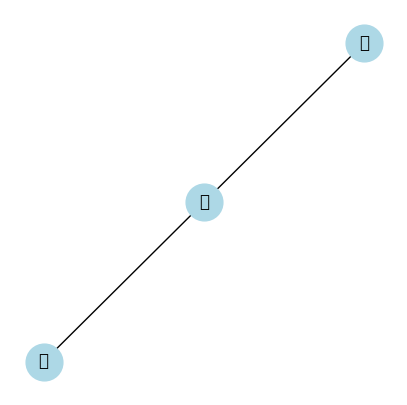

In [21]:
from janome.tokenizer import Tokenizer
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# テキスト例
texts = [
    "猫が庭で遊んでいる。",
    "犬と猫が仲良く遊ぶ。"
]

# Janomeで形態素解析
tokenizer = Tokenizer()
tokenized_texts = []
for text in texts:
    tokens = [token.surface for token in tokenizer.tokenize(text)
              if token.part_of_speech.startswith("名詞")]
    tokenized_texts.append(tokens)

# 共起ペアの抽出
pair_counts = Counter()
for tokens in tokenized_texts:
    for pair in combinations(set(tokens), 2):
        pair_counts[tuple(sorted(pair))] += 1

# ネットワーク作成
G = nx.Graph()
for (w1, w2), freq in pair_counts.items():
    G.add_edge(w1, w2, weight=freq)

# 可視化
pos = nx.spring_layout(G)
plt.figure(figsize=(5,5))
nx.draw_networkx_nodes(G, pos, node_size=700, node_color='lightblue')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, width=[d['weight'] for _,_,d in G.edges(data=True)])
plt.axis('off')
plt.show()

# 共起ネットワークにおける中心性

共起ネットワークでは、単語をノード、単語同士の共起関係をエッジとして表現します。  
このとき、ネットワーク内の単語（ノード）がどれだけ重要かを定量的に評価するために**中心性（Centrality）**という指標を用います。

中心性には複数の種類があり、それぞれ「単語の重要性」を異なる観点から表現します。

## 主な中心性指標

以下は代表的な中心性指標と、それぞれが表す意味です。

### 1. 次数中心性（Degree Centrality）

- **定義**  
  あるノードと直接つながっているノードの数（次数）です。
- **意味**  
  多くの単語と共起している単語ほど次数中心性が高くなります。
- **解釈例**  
  次数中心性が高い単語は、文章全体で幅広い文脈に関与している「汎用的なキーワード」である可能性があります。

### 2. 媒介中心性（Betweenness Centrality）

- **定義**  
  あるノードが他のノード同士を結ぶ最短経路上にどれだけ登場するかを測ります。
- **意味**  
  他の単語の橋渡しの役割を果たす単語を特定できます。
- **解釈例**  
  特定のテーマや話題をつなぐ「ハブ的な単語」を抽出できます。

### 3. 固有ベクトル中心性（Eigenvector Centrality）

- **定義**  
  重要なノードとつながっているノードをより高く評価する中心性です。
- **意味**  
  単に多くつながっているだけでなく、「重要な単語と強く関連している単語」に高いスコアを与えます。
- **解釈例**  
  コアな話題を構成する単語群の中で影響力を持つ単語を見つけられます。

### 4. クローズネス中心性（Closeness Centrality）

- **定義**  
  ネットワーク内の他のノードへの平均距離の逆数。
- **意味**  
  全体のネットワークにどれだけ近接しているかを示します。
- **解釈例**  
  他の単語に素早く「情報が届く」単語＝全体に関連する中心的な単語。


## 次数中心性の計算例（Python）

以下は`networkx`で次数中心性を計算する例です。


In [27]:
import networkx as nx

degree_centrality = nx.degree_centrality(G)

# 表示
for node, centrality in degree_centrality.items():
    print(f"{node}: {centrality:.3f}")

庭: 0.500
猫: 1.000
犬: 0.500


---

# 感情分析の概要と利用例

感情分析（Sentiment Analysis）は、テキストに含まれる**感情的な傾向（ポジティブ・ネガティブなど）**を自動的に判定する手法です。  
主にレビューやSNS投稿、アンケート回答などのテキストから、書き手の主観的な感情を数値化・分類するために用いられます。

## 基本的な考え方

感情分析では、テキストを対象として以下のような処理を行います。

1. 文章を単語に分割（形態素解析）
2. 単語の感情的意味や文脈をもとに、文章全体の極性（ポジティブ／ネガティブ）を判定
3. 必要に応じて、スコア化（例: -1.0〜1.0の数値）やカテゴリ分類を実施

感情分析は、数値では捉えにくい主観情報を定量化できる点で非常に有効です。

## 利用例

- 商品やサービスのレビュー分析（満足・不満）
- SNSの投稿分析（炎上傾向・評判変化の検出）
- 顧客アンケートの定性データの要約
- 映画・書籍・音楽などコンテンツの印象評価

## 特徴と留意点

感情分析は非常に有用ですが、以下のような課題も存在します。

- 皮肉・曖昧な表現に弱い
- 文脈に依存する語（「やばい」など）への対応が難しい
- 分析対象のドメインに適した辞書やモデルが必要な場合がある


## Pythonライブラリ「asari」による実装例

`asari`は日本語テキストの簡易的な感情分析を行う軽量なライブラリです。  
内部的には深層学習ベースのモデルを使用しており、学習済みモデルにより高い精度を持ちます。


In [43]:
from asari.api import Sonar

# Sonarインスタンスの生成
sonar = Sonar()

# 感情分析したい文章
text = "この映画はとても面白かった！"

# 分析の実行
result = sonar.ping(text)

# 結果の表示
print(result)

ModuleNotFoundError: No module named 'asari'

---

# ワードクラウドの概要と利用例

ワードクラウド（Word Cloud）は、テキストデータに含まれる単語の出現頻度を視覚的に表現する手法です。  
単語の出現回数が多いほどフォントサイズを大きく表示し、テキスト全体の特徴や主要なキーワードを直感的に把握できます。

## 基本的な考え方

- 入力テキストを単語に分割（トークン化）する
- 単語の出現頻度をカウントする
- 頻度に応じて文字サイズを変化させて単語を配置する

ワードクラウドでは、文章全体の「単語の重要性」を視覚的に確認できるため、探索的データ分析（EDA）や報告資料においてよく利用されます。

## 作成手順

1. **テキストの前処理**
   - 形態素解析を用いて単語単位に分割
   - 不要な品詞（助詞や記号など）を除外

2. **単語の出現頻度集計**
   - 各単語がテキスト内で何回出現したかをカウント

3. **レイアウト生成**
   - 頻度をもとにフォントサイズを決定
   - 単語を視認性の高いランダム配置で描画

4. **可視化**
   - 背景色やカラースケールで強調
   - 円形やハート形など形状を調整可能

## 利用例

- アンケートの自由記述回答から頻出ワードを抽出
- SNSやレビューの傾向を可視化
- 論文やニュース記事の主要な話題を把握
- 共起ネットワークなど他の手法と組み合わせて特徴を分析

## Pythonによる実装例

Pythonでは`wordcloud`ライブラリを用いることで簡単に作成できます。

In [41]:
from janome.tokenizer import Tokenizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# テキスト例
text = "猫が庭で遊んでいる。犬と猫が仲良く遊ぶ。"

# Janomeで形態素解析し、名詞だけ抽出
tokenizer = Tokenizer()
words = [token.surface for token in tokenizer.tokenize(text)
         if token.part_of_speech.startswith("名詞")]

# スペース区切りにする
words_joined = " ".join(words)

# ワードクラウド生成
wc = WordCloud(font_path="path_to_japanese_font.ttf",  # 日本語フォントのパスを指定
               width=600,
               height=400,
               background_color="white").generate(words_joined)

# 表示
plt.figure(figsize=(8, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()


ModuleNotFoundError: No module named 'wordcloud'

---

# まとめ

本ノートブックでは、日本語テキストを対象とした基本的な解析手法について実装を交えながら確認しました。

- 形態素解析により、文章を構成する単語や品詞情報を取得
- 共起ネットワークによって、単語間のつながりと構造的な関係を可視化
- ワードクラウドにより、頻出語を視覚的に把握
- 感情分析を通じて、テキストに含まれる主観的傾向を定量化

これらの手法はいずれも、テキストデータの性質を理解する上での基礎的なステップです。

次のノートブック（実践編）では、ここで紹介した技術を応用し、実際のテキストデータ（例：SNS投稿、レビュー、ニュース記事など）を用いた分析に進みます。  
具体的には、分析対象ごとの特徴抽出や比較、可視化、レポート生成までを含む実践的なプロセスを扱います。
